# Why studying causal inference?

## Understanding key drivers
When tackling real-world engineering problems, a fundamental goal is to understand the underlying mechanisms that govern a system and the **key drivers** affecting its performance. This understanding often comes from conducting experiments, which are foundational to scientific research. For instance, if we aim to determine the effect of a new solar panel design on energy conversion efficiency, systematic experimentation might be the first approach. Through controlled manipulation and observation, experiments help us establish clear cause-and-effect relationships.

## Experimental vs. observational data
Ideally, we collect **experimental data** where variables of interest are manipulated to observe changes in outcomes directly. This direct manipulation helps in establishing causality with greater certainty. However, in many real-world settings, such as economics or public policy, performing experiments can be impractical, expensive, or unethical. As a result, researchers and analysts often rely on **observational data**, which is data collected without any direct manipulation of variables.

Working with observational data introduces complexities, particularly in distinguishing between mere correlations and actual causal relationships. Observational data can reveal patterns and associations, but without the ability to control for all influencing factors, these correlations might lead to misleading conclusions about causality.


## Causal inference
Causal inference bridges this gap. It is a branch of statistics focused on determining cause-and-effect relationships from data where no explicit experimentation has been conducted. Unlike a mere correlation analysis, which only measures how variables move together, causal inference aims to uncover whether and how one variable influences another. This distinction is vital for informed decision-making across various domains, including economics, healthcare, and energy markets.

In the electricity market, understanding causal relationships is crucial. It enables stakeholders to predict the effects of policy changes, modify pricing strategies, and assess the impact of technological advancements on demand and supply dynamics. Causal inference provides the tools to make predictions about the consequences of potential actions, thereby supporting more strategic and effective decision-making.

# Correlation vs. Causation

Correlation measures the strength and direction of a relationship between two variables. However, correlation does not imply causation. For example, higher electricity usage and cold weather may be correlated (both happen in winter), but one does not cause the other.

Understanding this difference is crucial in the electricity market. For instance, a correlation between high electricity prices and high usage does not mean that high prices cause high usage; other factors like temperature could be influencing both.


## Directed Acyclic Graphs (DAGs)

Directed Acyclic Graphs (DAGs) are a visual representation of causal relationships. In DAGs, nodes represent variables, and edges represent causal links. These graphs help in understanding how different variables affect each other and in identifying potential confounding factors.

Here's a simple DAG representation:

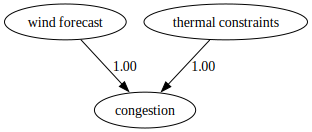

In [1]:
import numpy as np
from lingam.utils import make_dot

# Matrix of coefficients (weights)
m = np.array([[0.0, 0.0, 0.0],
              [1.0, 0.0, 1.0],
              [0.0, 0.0, 0.0]])

# Plotting causal graph
make_dot(m, labels=["wind forecast", "congestion", "thermal constraints"])

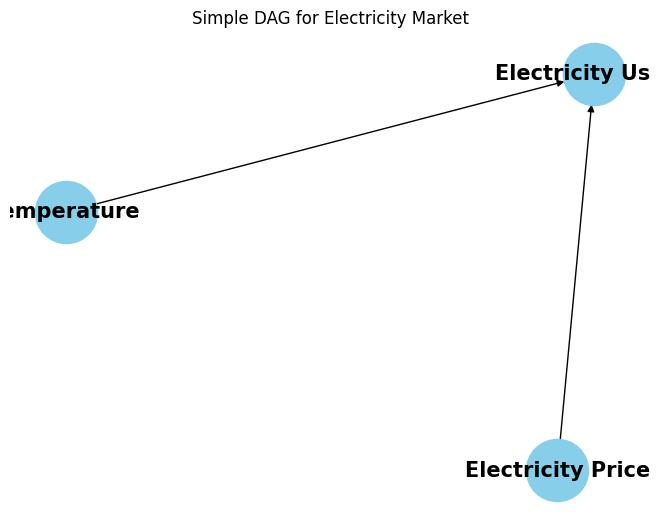

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a DAG
G = nx.DiGraph()
G.add_edges_from([('Electricity Price', 'Electricity Usage'), ('Temperature', 'Electricity Usage')])

# Plot the DAG
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold')
plt.title('Simple DAG for Electricity Market')
plt.show()

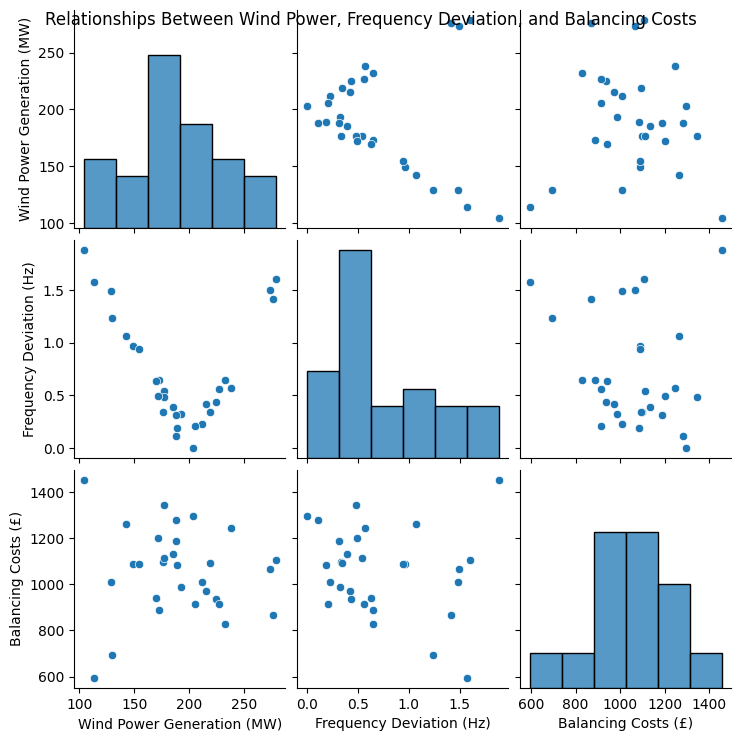

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of days
days = 30

# Simulating data
wind_power = np.random.normal(200, 50, days)  # Average wind generation in MW
frequency_deviation = np.abs(wind_power - 200) / 50 + np.random.normal(0, 0.1, days)  # Frequency deviation in Hz
balancing_costs = frequency_deviation * 75 + np.random.normal(1000, 200, days)  # Balancing costs in £

# Create DataFrame
data = pd.DataFrame({
    'Day': range(1, days+1),
    'Wind Power Generation (MW)': wind_power,
    'Frequency Deviation (Hz)': frequency_deviation,
    'Balancing Costs (£)': balancing_costs
})

# Pair plot to show relationships
sns.pairplot(data, vars=['Wind Power Generation (MW)', 'Frequency Deviation (Hz)', 'Balancing Costs (£)'])
plt.suptitle('Relationships Between Wind Power, Frequency Deviation, and Balancing Costs')
plt.show()
